In [58]:
#Reading Files#

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


insurance = pd.read_csv("insurance.csv")
insurance_encoded = pd.get_dummies(insurance, drop_first=True)
print(insurance_encoded)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400     False        True   
1      18  33.770         1   1725.55230      True       False   
2      28  33.000         3   4449.46200      True       False   
3      33  22.705         0  21984.47061      True       False   
4      32  28.880         0   3866.85520      True       False   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830      True       False   
1334   18  31.920         0   2205.98080     False       False   
1335   18  36.850         0   1629.83350     False       False   
1336   21  25.800         0   2007.94500     False       False   
1337   61  29.070         0  29141.36030     False        True   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False  

In [62]:
#Cleaning Data#

In [64]:
print(insurance_encoded.isnull().sum())


print(insurance_encoded.shape)


age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
(1338, 9)


In [66]:
#Calculating training set and test set#

In [68]:
def train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True):
    if len(arrays) == 0:
        raise ValueError("At least one array required.")
    n_samples = len(arrays[0])
    for arr in arrays:
        if len(arr) != n_samples:
            raise ValueError("All input arrays must have the same length.")
    if isinstance(random_state, int):
        rng = np.random.RandomState(random_state)
    else:
        rng = np.random if random_state is None else random_state
    if test_size is None and train_size is None:
        test_size = 0.25
    if test_size is not None:
        n_test = int(np.ceil(test_size * n_samples)) if isinstance(test_size, float) else int(test_size)
    else:
        n_test = n_samples - int(train_size)
    n_train = n_samples - n_test
    indices = rng.permutation(n_samples) if shuffle else np.arange(n_samples)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]
    result = []
    for arr in arrays:
        arr_np = np.array(arr) 
        result.append(arr_np[train_indices])
        result.append(arr_np[test_indices])
    return result


In [70]:
X = insurance_encoded.drop("charges", axis=1)
y = insurance_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape) 
print(y_train.shape) 

(1070, 8)
(268, 8)
(268,)
(1070,)


In [72]:
#Linear Regression & Gradient Descent#

In [74]:
def compute_cost_linear(X, y, w, b, lambda_=1):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= (2 * m)

   
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    total_cost = cost + reg_cost
    return total_cost

In [76]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    dj_dw += (lambda_ / m) * w

    return dj_dw, dj_db

In [78]:
def gradient_descent(x, y, w_init, b_init, learning_rate, iterations, lambda_=1):
    w = w_init
    b = b_init
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient_linear_reg(x, y, w, b, lambda_)

       
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i % 100 == 0 or i == iterations - 1:
            cost = compute_cost_linear(x, y, w, b, lambda_)
            w_str = ", ".join([f"{wi:.4f}" for wi in w])
            print(f"Iteration {i+1}: Cost = {cost:.4f}, w = [{w_str}], b = {b:.4f}")
    return w, b

In [80]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_encoded = X_train_df.astype(float)
X_mean = X_train_encoded.mean(axis=0)
X_std = X_train_encoded.std(axis=0)

X_std[X_std == 0] = 1 
X_train_norm = (X_train_encoded - X_mean) / X_std


y_train_np = y_train.astype(np.float64)

w_init = np.zeros(X_train_norm.shape[1])
b_init = 0
learning_rate = 0.01
iterations = 5000
w, b = gradient_descent(X_train_norm.values, y_train_np, w_init, b_init, learning_rate, iterations) 



Iteration 1: Cost = 157859174.8582, w = [35.6385, 23.4126, 7.2086, 8.2793, 94.2672, -3.1276, 8.2637, -4.3743], b = 133.1471
Iteration 101: Cost = 36974797.0130, w = [2295.0996, 1328.7436, 429.5666, 292.6543, 6017.2578, -58.3165, 163.3471, -180.4410], b = 8489.8333
Iteration 201: Cost = 20681210.3586, w = [3142.0329, 1723.9006, 548.3089, 202.6494, 8218.3167, -13.1524, -44.9378, -205.0639], b = 11548.6508
Iteration 301: Cost = 18420804.4546, w = [3458.2181, 1866.8636, 574.9194, 101.5090, 9049.7763, -5.8445, -211.1154, -229.3863], b = 12668.2769
Iteration 401: Cost = 18096799.6474, w = [3575.2301, 1927.9012, 577.8822, 39.4980, 9367.8926, -22.8542, -314.7942, -260.2906], b = 13078.0962
Iteration 501: Cost = 18046774.4321, w = [3617.9402, 1957.4786, 576.4708, 7.3782, 9490.9429, -46.8295, -378.8556, -290.6213], b = 13228.1034
Iteration 601: Cost = 18037378.3245, w = [3633.2062, 1973.1785, 575.1167, -7.9872, 9539.0540, -69.6738, -420.1691, -316.5858], b = 13283.0108
Iteration 701: Cost = 1803

In [81]:
def predict(X, w, b):
    return np.dot(X, w) + b
    
Y_pred = predict(X_train_norm.values, w, b)



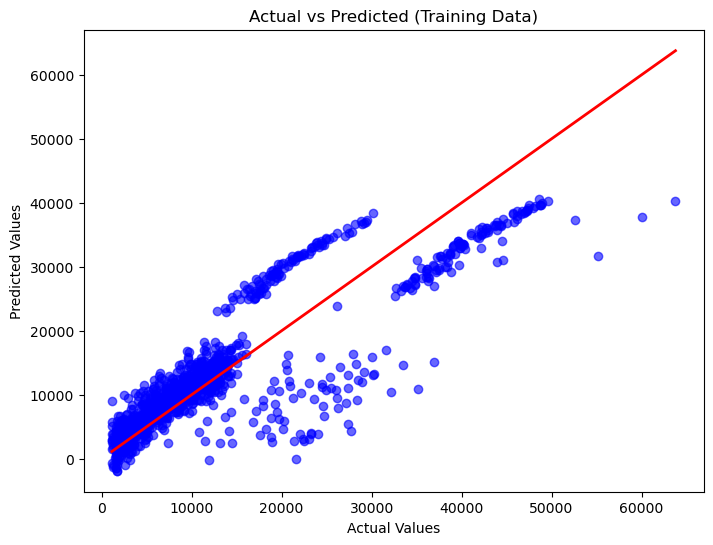

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, Y_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Training Data)")
plt.show()

In [83]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_encoded = X_test_df.astype(float) 
X_test_norm = (X_test_encoded - X_mean) / X_std
X_test_norm[np.isnan(X_test_norm)] = 0 
y_pred_test = predict(X_test_norm.values, w, b)


ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred_test) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print(f"Linear Regression R² Score : {round(r2_score, 2)}")

Linear Regression R² Score : 0.75


In [84]:
X_ne = insurance_encoded.drop("charges", axis=1).astype(float)
y_ne = insurance_encoded["charges"].astype(float)

X_train_ne, X_test_ne, y_train_ne, y_test_ne = train_test_split(X_ne, y_ne, test_size=0.2, random_state=42)

X_train_ne_bias = np.c_[np.ones(X_train_ne.shape[0]), X_train_ne]
X_test_ne_bias = np.c_[np.ones(X_test_ne.shape[0]), X_test_ne]


XtX = np.dot(X_train_ne_bias.T, X_train_ne_bias)
Xty = np.dot(X_train_ne_bias.T, y_train_ne)
try:
    theta = np.linalg.solve(XtX, Xty)
except np.linalg.LinAlgError:
    theta = np.dot(np.linalg.pinv(XtX), Xty)
y_pred_ne = np.dot(X_test_ne_bias, theta)

ss_tot_ne = np.sum((y_test_ne - np.mean(y_test_ne)) ** 2)
ss_res_ne = np.sum((y_test_ne - y_pred_ne) ** 2)
r2_score_ne = 1 - (ss_res_ne / ss_tot_ne)

print("Linear Regression R² Score :", round(r2_score_ne, 2))

Linear Regression R² Score : 0.75


In [91]:
print("Thus R^2 value obtained by both methods is the same ")

Thus R^2 value obtained by both methods is the same 
